# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In the following sections my implementation of the traffic sign classifier project is presented.

## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = 'train.p'
validation_file = 'test.p'
testing_file = 'valid.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

## Step 1: Dataset Summary & Exploration

### Basic Summary of the Data Set

In [2]:
n_train = y_train.shape[0]

n_validation = y_valid.shape[0]

n_test = y_test.shape[0]

image_shape = X_train[0].shape

labels = set(y_test)
n_classes = len(labels)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 4410
Number of validation examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Visualization of the Data set

Below is the distribution of the different labels across the three different data sets.

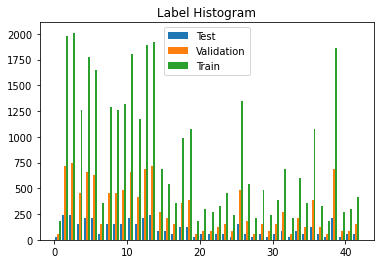

In [3]:
%matplotlib inline
from src.data_visualizer import DataVisualizer

visualizer = DataVisualizer(X_test, y_test, y_valid, y_train, n_classes)
visualizer.generate_histogram()

Below is a visualization of all the unique traffic signs found on the data set.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


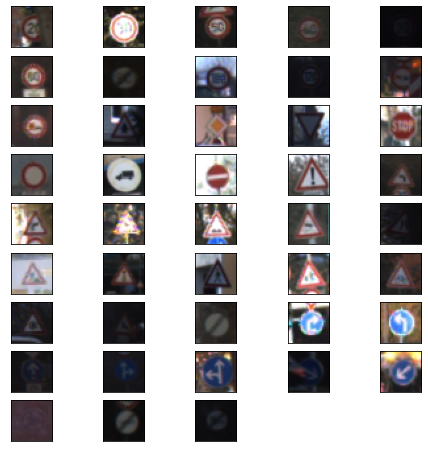

In [4]:
visualizer.visualize()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Shuffle the data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [6]:
### Setup
EPOCHS = 20
BATCH_SIZE = 256

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import src.lenet as ln

### Setup CNN
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
low_keep_prob = tf.placeholder(tf.float32)
high_keep_prob = tf.placeholder(tf.float32)
one_shot_y = tf.one_hot(y, 43)

learning_rate = 0.001

logits = ln.network(x, True, True, low_keep_prob, high_keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_shot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.Flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [8]:
### Set up accuracy computation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_shot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, low_keep_prob: 1, high_keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Training...

EPOCH 1 ...
Validation Accuracy = 0.687
Training Accuracy = 0.719
Test Accuracy = 0.665

EPOCH 2 ...
Validation Accuracy = 0.876
Training Accuracy = 0.905
Test Accuracy = 0.875

EPOCH 3 ...
Validation Accuracy = 0.906
Training Accuracy = 0.950
Test Accuracy = 0.921

EPOCH 4 ...
Validation Accuracy = 0.923
Training Accuracy = 0.969
Test Accuracy = 0.937

EPOCH 5 ...
Validation Accuracy = 0.934
Training Accuracy = 0.978
Test Accuracy = 0.936

EPOCH 6 ...
Validation Accuracy = 0.936
Training Accuracy = 0.981
Test Accuracy = 0.944

EPOCH 7 ...
Validation Accuracy = 0.941
Training Accuracy = 0.985
Test Accuracy = 0.950

EPOCH 8 ...
Validation Accuracy = 0.946
Training Accuracy = 0.989
Test Accuracy = 0.955

EPOCH 9 ...
Validation Accuracy = 0.950
Training Accuracy = 0.989
Test Accuracy = 0.955

EPOCH 10 ...
Validation Accuracy = 0.945
Training Accuracy = 0.991
Test Accuracy = 0.958

EPOCH 11 ...
Validation Accuracy = 0.947
Training Accuracy = 0.991
Test Accuracy = 0.955

EPOCH 

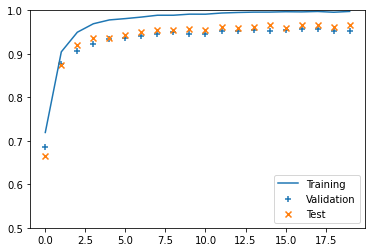

Model written.


In [9]:
### Train
low_keep_prob_v = 0.5                                                                                               
high_keep_prob_v = 0.7

from src.session_wrapper import SessionWrapper
session_wrapper = SessionWrapper("./lenet")

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = X_train.shape[0]
    
    load_sess = False

    if not load_sess:
        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(
                    training_operation,
                    feed_dict={
                        x: batch_x,
                        y: batch_y,
                        low_keep_prob: low_keep_prob_v,
                        high_keep_prob: high_keep_prob_v,
                    },
                )

            validation_accuracy = evaluate(X_valid, y_valid)
            training_accuracy = evaluate(X_train, y_train)
            test_accuracy = evaluate(X_test, y_test)
            print("EPOCH {} ...".format(i + 1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print("Training Accuracy = {:.3f}".format(training_accuracy))
            print("Test Accuracy = {:.3f}".format(test_accuracy))
            print()
            visualizer.add_training_accuracy(training_accuracy)
            visualizer.add_validation_accuracy(validation_accuracy)
            visualizer.add_test_accuracy(test_accuracy)
        visualizer.visualize_accuracy()

        session_wrapper.write(sess)
    else:
        session_wrapper.read(sess)
        validation_accuracy = evaluate(X_valid, y_valid)
        test_accuracy = evaluate(X_test, y_test)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Test Accuracy = {:.3f}".format(test_accuracy))


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

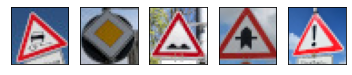

In [10]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt

internet_file = "internet.p"
with open(internet_file, mode="rb") as f:
    internet = pickle.load(f)

f, axes = plt.subplots(1,5)
for i in range(0, 5):
    im = plt.imread(internet["file_names"][i])
    axes[i].imshow(im)
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)

### Predict the Sign Type for Each Image

In [11]:
with tf.Session() as sess:
    session_wrapper.read(sess)
    print("Labeling...")
    result = sess.run(
        tf.argmax(logits, 1),
        feed_dict={x: internet["images"][0:5], low_keep_prob: 1, high_keep_prob: 1},
    )

    for i in range(0, len(result)):
        print(
            "name: "
            + internet["file_names"][i]
            + " predicted label: "
            + str(result[i])
            + " label: "
            + str(internet["labels"][i])
        )

INFO:tensorflow:Restoring parameters from ./lenet
Model read.
Labeling...
name: extra_traffic_signs/00000.jpg predicted label: 23 label: 23
name: extra_traffic_signs/00001.jpg predicted label: 12 label: 12
name: extra_traffic_signs/00002.jpg predicted label: 22 label: 22
name: extra_traffic_signs/00003.jpg predicted label: 12 label: 11
name: extra_traffic_signs/00004.jpg predicted label: 18 label: 18


### Analyze Performance

In [12]:
with tf.Session() as sess:
    session_wrapper.read(sess)
    accuracy = sess.run(
        accuracy_operation,
        feed_dict={
            x: internet["images"][0:5],
            y: internet["labels"][0:5],
            low_keep_prob: 1,
            high_keep_prob: 1,
        },
    )
    print("Internet Accuracy = {:.3f}".format(accuracy))


INFO:tensorflow:Restoring parameters from ./lenet
Model read.
Internet Accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [13]:
 with tf.Session() as sess:
    session_wrapper.read(sess)       
    softmax = sess.run(
        tf.nn.softmax(logits),
        feed_dict={x: internet["images"][0:5], low_keep_prob: 1, high_keep_prob: 1},
    )
    softmax_tuples = []
    for image_softmax in softmax:
        softmax_tuples.append([])
        for i in range(0, len(image_softmax)):
            softmax_tuples[-1].append({"id": i, "p": image_softmax[i]})
    output_strings = []
    cnt = 0
    for softmax_tuple in softmax_tuples:
        softmax_tuple.sort(key=lambda x: x["p"])
        string = ""
        for i in range(0, 5):
            idx = - 1 - i
            sm = softmax_tuple[idx]
            string += internet["names"][sm["id"]] + " | " + str(sm["p"] * 100) + '\n'
        print("Image: " + str(cnt))
        print("name | probability (%)")
        print(string)
        cnt += 1

INFO:tensorflow:Restoring parameters from ./lenet
Model read.
Image: 0
name | probability (%)
Slippery road | 99.95623230934143
Dangerous curve to the left | 0.04225973680149764
Dangerous curve to the right | 0.0013260516425361857
Wild animals crossing | 0.00014794593425904168
Road work | 3.6290612115408294e-05

Image: 1
name | probability (%)
Priority road | 100.0
Roundabout mandatory | 1.4013895838042856e-11
Yield | 9.270988424726315e-14
No vehicles | 1.2070259203043182e-14
Speed limit (50km/h) | 8.382124887720759e-15

Image: 2
name | probability (%)
Bumpy road | 100.0
Bicycles crossing | 3.09281866783806e-07
Wild animals crossing | 2.370498242143526e-09
Road work | 4.0936021933335454e-10
Traffic signals | 1.7043724287804651e-10

Image: 3
name | probability (%)
Priority road | 65.50020575523376
No passing for vehicles over 3.5 metric tons | 18.11521202325821
Right-of-way at the next intersection | 10.743517428636551
Slippery road | 4.0235355496406555
End of no passing by vehicles ove